# Notebook for data exploration

⚠️ The data that is explored is only the training data and NOT the test data. But transformations applied to the training data will also be applied to the test data, of course. This is important to let our model "see" the same world of data! 

In [53]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
path_train_data = Path("/Users/johanneseder711/Documents/Python/01_active/Fan Predictor/S3_split_data/train.csv")

In [75]:
if path_train_data.exists():
    df_train = pd.read_csv(path_train_data, sep=';', parse_dates=[0], infer_datetime_format=True)
else:
    print("There was a problem with the path that you provided to import the data - please check:\n %s"%path_train_data)

In [76]:
df_train.head()

,Datetime,Liga,Round,Hometeam,Hometeam Standing,Hometeam points,Awayteam,Awayteam Standing,Awayteam points,Fans watching,...,location_lattitude,location_longitude,temp,feelslike,humidity,precip,snow,windspeed,cloudcover,conditions
0,2021-08-15 17:30:00,2 Klasse Yspertal/AV,1. Runde,Emmersdorf,7,0,Leiben,7,0,120,...,48.246908,15.333008,26.9,28.0,60.0,0.0,NaN,10.6,0.0,Clear
1,2021-08-15 17:30:00,2 Klasse Yspertal/AV,1. Runde,Nöchling,7,0,Alpenvorland USG,7,0,126,...,48.223577,14.986886,29.3,30.2,50.3,0.0,NaN,5.2,3.3,Clear
2,2021-08-15 17:30:00,2 Klasse Yspertal/AV,1. Runde,Pöggstall,7,0,Erlauf,7,0,0,...,48.313518,15.187767,27.2,28.2,57.6,0.0,NaN,8.3,0.0,Clear
3,2021-08-13 20:00:00,2 Klasse Yspertal/AV,1. Runde,Jauerling,7,0,Kleinpöchlarn,7,0,42,...,48.303540,15.343772,21.9,21.9,77.5,0.0,NaN,13.8,0.9,Clear
4,2021-08-22 17:00:00,2 Klasse Yspertal/AV,2. Runde,Neumarkt,7,1,Weiten,11,0,140,...,48.137429,15.057692,21.3,21.3,76.8,0.0,NaN,4.4,0.0,Clear


In [82]:
df_train.columns

Index(['Datetime', 'Liga', 'Round', 'Hometeam', 'Hometeam Standing',
       'Hometeam points', 'Awayteam', 'Awayteam Standing', 'Awayteam points',
       'Fans watching', 'Match location', 'postal_codes_hometeam',
       'geopy_location_hometeam', 'geopy_lat_long_coordinates_hometeam',
       'postal_codes_awayteam', 'geopy_location_awayteam',
       'geopy_lat_long_coordinates_awayteam', 'distance_between_locations',
       'Datetime_string', 'Datetime_string.1', 'location_lattitude',
       'location_longitude', 'temp', 'feelslike', 'humidity', 'precip', 'snow',
       'windspeed', 'cloudcover', 'conditions'],
      dtype='object')

In [78]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Datetime                             1980 non-null   datetime64[ns]
 1   Liga                                 1980 non-null   object        
 2   Round                                1980 non-null   object        
 3   Hometeam                             1980 non-null   object        
 4   Hometeam Standing                    1980 non-null   int64         
 5   Hometeam points                      1980 non-null   int64         
 6   Awayteam                             1980 non-null   object        
 7   Awayteam Standing                    1980 non-null   int64         
 8   Awayteam points                      1980 non-null   int64         
 9   Fans watching                        1980 non-null   int64         
 10  Match locati

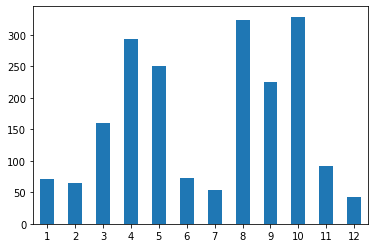

In [79]:
#plot how many games have been played per month
df_train.Datetime.dt.month.value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

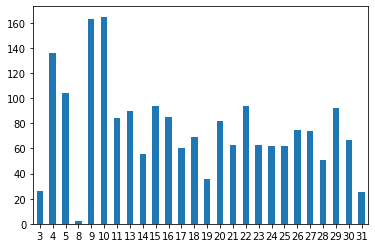

In [81]:
#plot how many games have been played per month
df_train.Datetime.dt.day.value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

In [89]:
df_train[df_train.Datetime==df_train.Datetime.min()]

,Datetime,Liga,Round,Hometeam,Hometeam Standing,Hometeam points,Awayteam,Awayteam Standing,Awayteam points,Fans watching,...,location_lattitude,location_longitude,temp,feelslike,humidity,precip,snow,windspeed,cloudcover,conditions
29,2021-01-10 19:30:00,2 Klasse Yspertal/AV,6. Runde,Leiben,2,11,Alpenvorland USG,5,8,91,...,48.237764,15.269308,-5.9,-9.1,91.3,0.0,NaN,6.5,5.4,Clear
180,2021-01-10 19:30:00,2 Klasse Ybbstal/AV,8. Runde,Wolfsbach,15,1,Strengberg,13,3,90,...,48.079362,14.666345,-4.7,-4.7,91.0,0.0,NaN,3.6,22.8,Partially cloudy
320,2021-01-10 19:30:00,1 Klasse Nord,8. Runde,Deutsch Wagram,2,17,Poysdorf,4,15,120,...,48.155461,14.497568,-4.8,-4.8,92.2,0.0,NaN,3.9,22.5,Partially cloudy
479,2021-01-10 19:30:00,1 Klasse Ost,8. Runde,Haslau,16,3,Maria Lanzendorf,1,18,80,...,48.113106,16.700329,-2.9,-4.8,93.6,0.0,NaN,4.8,0.0,Clear
480,2021-01-10 19:30:00,1 Klasse Ost,8. Runde,Sommerein,3,16,Himberg,5,13,150,...,47.989793,16.657811,-2.1,-2.1,92.7,0.0,NaN,4.4,17.2,Clear
721,2021-01-10 19:30:00,1 Klasse Süd,8. Runde,Wiesmath,12,4,Bad Erlach,13,3,151,...,47.613725,16.288277,-2.9,-5.2,89.9,0.0,NaN,5.7,53.0,Partially cloudy
722,2021-01-10 19:30:00,1 Klasse Süd,8. Runde,Zöbern,3,16,Pfaffstätten,14,2,70,...,47.509037,16.130749,-5.6,-8.2,86.7,0.0,NaN,5.4,67.4,Partially cloudy
852,2021-01-10 19:30:00,1 Klasse West,8. Runde,Waldhausen-OÖ/G.,7,10,Waidhofen/Ybbs SC,2,18,130,...,48.275648,14.949777,-7.0,-10.1,91.8,0.0,NaN,5.9,3.8,Clear
979,2021-01-10 19:30:00,1 Klasse Nordwest,8. Runde,Gaubitsch,10,8,Unterstinkenbrunn,4,12,180,...,48.663365,16.367850,-3.3,-8.3,89.3,0.0,NaN,14.5,7.4,Clear
1109,2021-01-10 19:30:00,Gebietsliga Nord/Nordwest,8. Runde,FC Klosterneuburg,11,7,Langenlebarn,4,13,160,...,48.301427,16.305464,-2.7,-2.7,87.9,0.0,NaN,3.4,0.0,Clear


<AxesSubplot:xlabel='Datetime'>

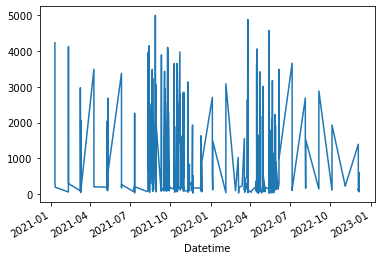

In [43]:
df_train.groupby('Datetime').sum()['Fans watching'].plot(kind='line')

In [32]:
df_train[df_train.Liga.str.contains('Landesliga')].sort_values(by='Datetime')

,Datetime,Liga,Round,Hometeam,Hometeam Standing,Hometeam points,Awayteam,Awayteam Standing,Awayteam points,Fans watching,...,location_lattitude,location_longitude,temp,feelslike,humidity,precip,snow,windspeed,cloudcover,conditions
1754,2021-01-10 19:30:00,2 Landesliga West,8. Runde,Wieselburg,2,17,Melk,11,6,400,...,48.123885,15.133193,-5.0,-7.2,90.7,0.0,NaN,4.9,17.2,Clear
1878,2021-01-10 19:30:00,1 Landesliga,8. Runde,Kremser SC,2,16,ASK Kottingbrunn,10,7,300,...,48.416976,15.602787,-2.9,-2.9,84.2,0.0,NaN,3.7,0.1,Clear
1879,2021-01-10 19:30:00,1 Landesliga,8. Runde,SC Ortmann,7,9,SCU Kilb,12,6,220,...,48.021873,15.371111,-4.1,-6.7,89.3,0.0,NaN,6.0,19.9,Clear
1880,2021-01-10 19:30:00,1 Landesliga,8. Runde,SCU Ardagger,4,12,SC Zwettl,3,14,350,...,48.161527,14.844614,-4.8,-4.8,91.4,0.0,NaN,3.8,4.2,Clear
1877,2021-01-10 19:30:00,1 Landesliga,8. Runde,ASV Schrems,13,5,SKN St. Pölten Juniors,9,7,320,...,48.793663,15.064902,-6.7,-6.7,91.9,0.0,NaN,2.3,27.9,Partially cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1922,2022-12-03 17:00:00,1 Landesliga,16. Runde,ASK Mannersdorf,15,4,SCU Ardagger,4,23,155,...,47.975090,16.599175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1796,2022-12-04 20:00:00,2 Landesliga West,16. Runde,Seitenstetten,11,16,Rabenstein,6,22,185,...,48.032287,14.667909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1661,2022-12-04 20:00:00,2 Landesliga Ost,15. Runde,Mistelbach,12,14,Stockerau SV,2,26,175,...,48.571398,16.568990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1795,2022-12-04 20:00:00,2 Landesliga West,16. Runde,Purgstall,7,19,Amaliendorf,8,19,120,...,48.058657,15.134536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
